# L2. EKF Localization 

### Define all the imports

In [1]:
import sys
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Change to main repo folder for the imports
_, dir = os.path.split(os.getcwd())
if dir == 'notebooks': 
    os.chdir('..')
    sys.path.append(os.getcwd())
pd.set_option('mode.chained_assignment', None)

In [3]:
from src.localization.dead_reckoning import DeadReckoning
from src.localization.EKF import ExtendedKalmanFilter

### Set dataset

In [4]:
# Define dataset to read
dataset = "data/MRCLAM_Dataset2" # Dataset
end_frame = 15000 # Extension of the dataset
robot = 'Robot3' # Robot

### Execute DR estimation

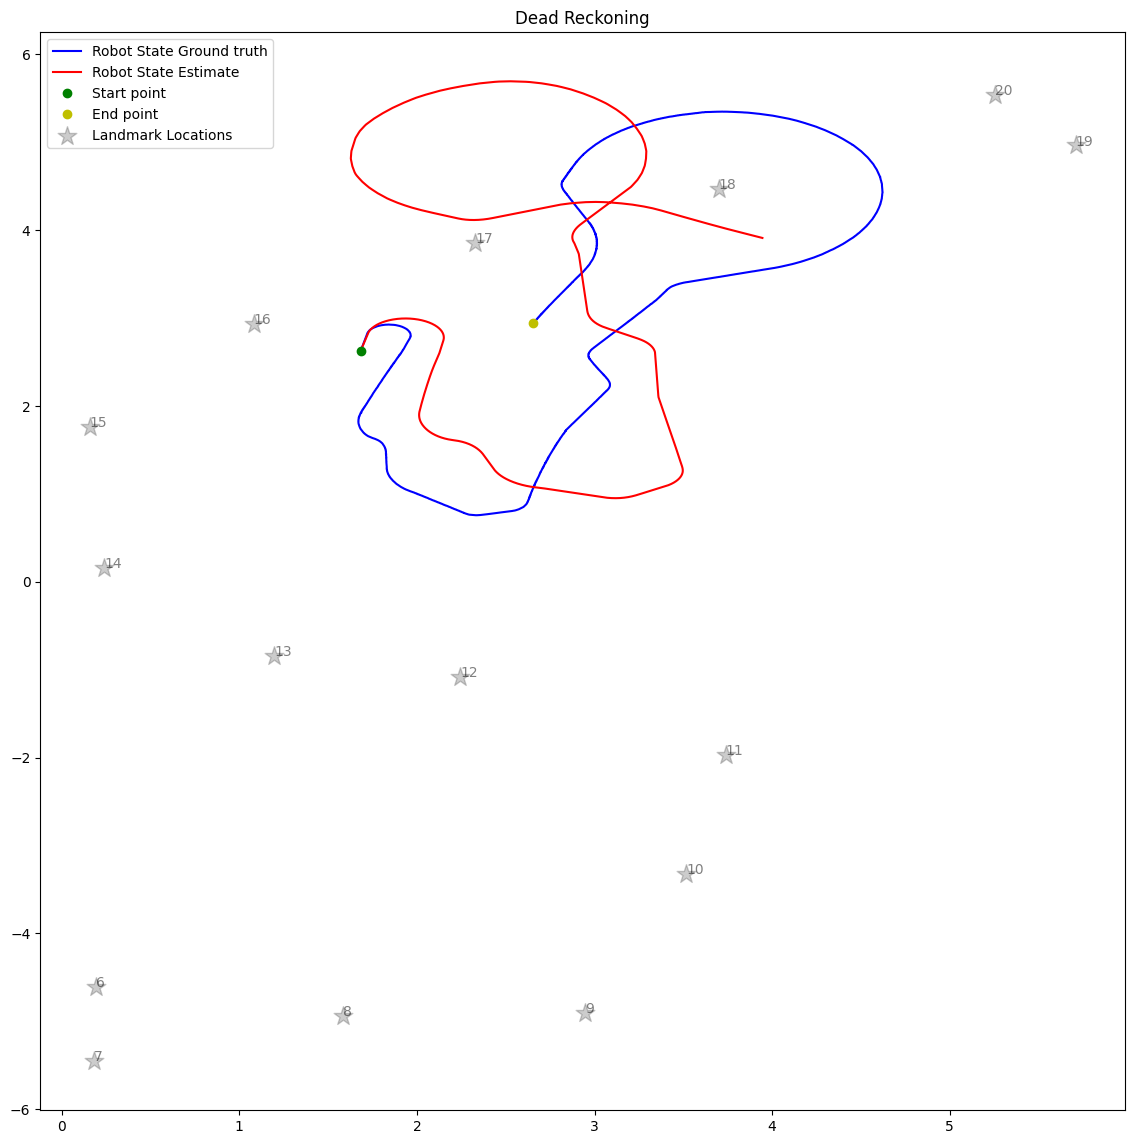

In [5]:
# Build dead reckoning object
dr = DeadReckoning(dataset, robot, end_frame)
dr.run()

### TASK 1. Execute EKF estimation.
Complete the extended kalman filter estimation code.
R y Q son las correciones de error para las acciones y las measurememnts

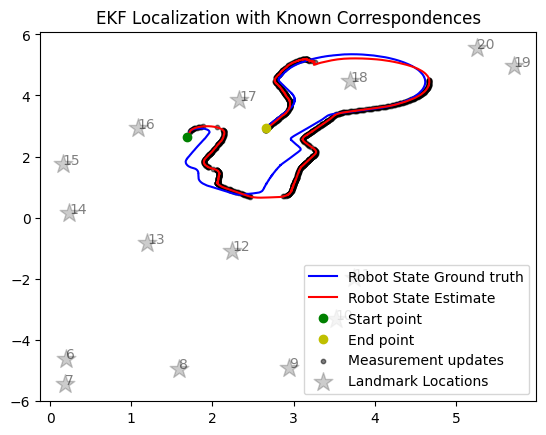

In [6]:
# Build Extended Kalman Filter object
R = np.diagflat(np.array([0.10, 0.10, 1.0]))** 2 
Q = np.diagflat(np.array([100, 100, 1e16]))** 2
ekf = ExtendedKalmanFilter(dataset, robot, end_frame, R, Q)

In [13]:
R 

array([[0.01, 0.  , 0.  ],
       [0.  , 0.01, 0.  ],
       [0.  , 0.  , 1.  ]])

In [11]:
Q

array([[1.e+04, 0.e+00, 0.e+00],
       [0.e+00, 1.e+04, 0.e+00],
       [0.e+00, 0.e+00, 1.e+32]])

### TASK 2. Compute path error metrics
1. Build a dataframe joining the GT with the dead reckoning and EKF state estimation.


2. Compute the $ATE$ using the groundtruth states $GT$, the dead reckoning estimated states $S_{DR}$ and the extended Kalman filter estimated states $S_{EKF}$.

The $ATE$ is then the root mean square error (RMSE) of the individual timestamp errors over the whole trajectory

And the $Delta$ represents the vector of displacements.

$Delta = GT[:-1] - GT[1:]$


### TASK 3. Iterate over diferent datasets
Here we are interested on executing multiple experiments using different robots and datasets and get the error from previous blocks for all the experiments and enable further analisis.

The iterative execution of different experiments will enable as to compare different localization algorithms on further lab sessions.

#### Generate metrics

In [7]:
datasets = ["../data/MRCLAM_Dataset1",
            "../data/MRCLAM_Dataset2",
            "../data/MRCLAM_Dataset3",
            "../data/MRCLAM_Dataset4"]
robots = ['Robot1',
          'Robot2',
          'Robot3',
          'Robot4']

results = pd.DataFrame(columns=['dataset','robot','length','duration','n_landmarks','distance','m_density','ate'])

#for ds in datasets:
   #for rob in robots:
        # Load data
        
        # Get the error

#### Represent metrics
For instance you could use the catplot of the seaborn library. Feel free to use another informative plot.

In [8]:
# Represent metrics for all experiments

#### Analize metrics

In [9]:
# Analize the results and provide the mean error metrics across the experiments performed.